In [ ]:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from sklearn import *
from statistics import *

In [ ]:
data = pd.read_csv ('70_Desc.csv',sep=',',dtype= np.float64)
x = data.iloc[:, 0:65]
y = data.iloc[:, 65]

In [ ]:
#Gradient Boosting
t1 = time.process_time()
n_repeat = 5
outer_cv = KFold(n_splits=5, shuffle=True, random_state=7)

GBrmse = []
GBmae = []
GBr2 = []
for i in range(n_repeat):
    for train_idx, test_idx in outer_cv.split(x, y):
        train_data, test_data = x.iloc[train_idx], x.iloc[test_idx]
        train_target = y.iloc[train_idx]
    
        model = ensemble.GradientBoostingRegressor(n_estimators= 1000, learning_rate= 0.1, loss= 'ls')
    
        classifier = model.fit(train_data, train_target)
        y_pred = classifier.predict(test_data)
        rmsee = np.sqrt(metrics.mean_squared_error(y.iloc[test_idx], y_pred))
        maee = metrics.mean_absolute_error(y.iloc[test_idx], y_pred)
        r22 = metrics.r2_score(y.iloc[test_idx], y_pred)
        GBrmse.append(rmsee)
        GBmae.append(maee)
        GBr2.append(r22)
        #print(rmse)
t2 = time.process_time()
print('Time is ', str(t2-t1), ' secs \n')
print('Rmse per split: ', GBrmse)
print('Mae per split: ', GBmae)
print('R2 per split: ', GBr2)
print('Mean RMSE: ', mean(GBrmse))
print('Mean MAE: ', mean(GBmae))
print('Mean R2: ', mean(GBr2))

Time is  292.6659250910001  secs 

Rmse per split:  [7.961775520326945, 7.88244193865182, 8.71572488511719, 8.162432734549009, 8.461977820812427, 7.961775520326945, 7.88244193865182, 8.715724885117188, 8.161618809239064, 8.461977820812427, 7.961775520326945, 7.882441938651819, 8.71572488511719, 8.161618809239062, 8.461977820812425, 7.961775520326945, 7.882441938651821, 8.71572488511719, 8.161292061718111, 8.461977820812427, 7.961775520326944, 7.882441938651819, 8.715724885117192, 8.16129206171811, 8.457811528165632]
Mae per split:  [5.926739487123885, 5.966053807369444, 6.304173129357111, 5.884409641382283, 6.19213966815882, 5.926739487123885, 5.966053807369443, 6.304173129357109, 5.882084383944867, 6.19213966815882, 5.926739487123886, 5.966053807369443, 6.304173129357112, 5.882084383944868, 6.19213966815882, 5.926739487123885, 5.966053807369443, 6.304173129357111, 5.879411406395125, 6.19213966815882, 5.926739487123883, 5.966053807369443, 6.30417312935711, 5.879411406395125, 6.18803861

In [ ]:
#Multilayer Perceptron
t1 = time.process_time()
n_repeat = 5
outer_cv = KFold(n_splits=5, shuffle=True, random_state=7)

MLPrmse = []
MLPmae = []
MLPr2 = []
for i in range(n_repeat):
    for train_idx, test_idx in outer_cv.split(x, y):
        train_data, test_data = x.iloc[train_idx], x.iloc[test_idx]
        train_target = y.iloc[train_idx]
    
        model = neural_network.MLPRegressor(hidden_layer_sizes=500, activation='relu', max_iter=500, solver='adam', alpha=0.1, batch_size='auto', 
                                            learning_rate='adaptive', learning_rate_init=0.01, shuffle=True, random_state=7)
    
        classifier = model.fit(train_data, train_target)
        y_pred = classifier.predict(test_data)
        rmsee = np.sqrt(metrics.mean_squared_error(y.iloc[test_idx], y_pred))
        maee = metrics.mean_absolute_error(y.iloc[test_idx], y_pred)
        r22 = metrics.r2_score(y.iloc[test_idx], y_pred)
        MLPrmse.append(rmsee)
        MLPmae.append(maee)
        MLPr2.append(r22)
        #print(rmse)
t2 = time.process_time()
print('Time is ', str(t2-t1), ' secs \n')
print('Rmse per split: ', MLPrmse)
print('Mae per split: ', MLPmae)
print('R2 per split: ', MLPr2)
print('Mean RMSE: ', mean(MLPrmse))
print('Mean MAE: ', mean(MLPmae))
print('Mean R2: ', mean(MLPr2))

Time is  518.106980178  secs 

Rmse per split:  [8.193050839118863, 7.6293487950736525, 7.733754733897395, 8.317420414769742, 8.49052035997018, 8.193050839118863, 7.6293487950736525, 7.733754733897395, 8.317420414769742, 8.49052035997018, 8.193050839118863, 7.6293487950736525, 7.733754733897395, 8.317420414769742, 8.49052035997018, 8.193050839118863, 7.6293487950736525, 7.733754733897395, 8.317420414769742, 8.49052035997018, 8.193050839118863, 7.6293487950736525, 7.733754733897395, 8.317420414769742, 8.49052035997018]
Mae per split:  [6.206287737432005, 5.771714383621224, 5.776037503375499, 6.356405024930073, 6.3985143800550786, 6.206287737432005, 5.771714383621224, 5.776037503375499, 6.356405024930073, 6.3985143800550786, 6.206287737432005, 5.771714383621224, 5.776037503375499, 6.356405024930073, 6.3985143800550786, 6.206287737432005, 5.771714383621224, 5.776037503375499, 6.356405024930073, 6.3985143800550786, 6.206287737432005, 5.771714383621224, 5.776037503375499, 6.356405024930073,

In [ ]:
#Random Forest
t1 = time.process_time()
n_repeat = 5
outer_cv = KFold(n_splits=5, shuffle=True, random_state=7)

RFrmse = []
RFmae = []
RFr2 = []
for i in range(n_repeat):
    for train_idx, test_idx in outer_cv.split(x, y):
        train_data, test_data = x.iloc[train_idx], x.iloc[test_idx]
        train_target = y.iloc[train_idx]
    
        model = ensemble.RandomForestRegressor(n_estimators= 1000, random_state=7)
    
        classifier = model.fit(train_data, train_target)
        y_pred = classifier.predict(test_data)
        rmsee = np.sqrt(metrics.mean_squared_error(y.iloc[test_idx], y_pred))
        maee = metrics.mean_absolute_error(y.iloc[test_idx], y_pred)
        r22 = metrics.r2_score(y.iloc[test_idx], y_pred)
        RFrmse.append(rmsee)
        RFmae.append(maee)
        RFr2.append(r22)
        #print(rmse)
t2 = time.process_time()
print('Time is ', str(t2-t1), ' secs \n')
print('Rmse per split: ', RFrmse)
print('Mae per split: ', RFmae)
print('R2 per split: ', RFr2)
print('Mean RMSE: ', mean(RFrmse))
print('Mean MAE: ', mean(RFmae))
print('Mean R2: ', mean(RFr2))

Time is  861.42458846  secs 

Rmse per split:  [7.267535454028512, 7.146685798602725, 7.884995735627071, 7.423686609934189, 7.229581526839614, 7.267535454028512, 7.146685798602725, 7.884995735627071, 7.423686609934189, 7.229581526839614, 7.267535454028512, 7.146685798602725, 7.884995735627071, 7.423686609934189, 7.229581526839614, 7.267535454028512, 7.146685798602725, 7.884995735627071, 7.423686609934189, 7.229581526839614, 7.267535454028512, 7.146685798602725, 7.884995735627071, 7.423686609934189, 7.229581526839614]
Mae per split:  [4.993076639784942, 4.745514395161294, 5.16326783602151, 4.999102338709683, 4.714076541049802, 4.993076639784942, 4.745514395161294, 5.16326783602151, 4.999102338709683, 4.714076541049802, 4.993076639784942, 4.745514395161294, 5.16326783602151, 4.999102338709683, 4.714076541049802, 4.993076639784942, 4.745514395161294, 5.16326783602151, 4.999102338709683, 4.714076541049802, 4.993076639784942, 4.745514395161294, 5.16326783602151, 4.999102338709683, 4.7140765

In [ ]:
#Voting Ensemble
t1 = time.process_time()

models = list()
mlp = neural_network.MLPRegressor(hidden_layer_sizes=500, activation='relu', max_iter=500, solver='adam', alpha=0.1, batch_size='auto', 
                                            learning_rate='adaptive', learning_rate_init=0.01, shuffle=True, random_state=7)
gbr = ensemble.GradientBoostingRegressor(n_estimators= 1000, learning_rate= 0.1, loss= 'ls')
rf = ensemble.RandomForestRegressor(n_estimators= 1000, random_state=7)

models.append(('mlp', mlp))
models.append(('gbr', gbr))
models.append(('rf', rf))

n_repeat = 5
outer_cv = KFold(n_splits=5, shuffle=True, random_state=7)

rmse = []
mae = []
r2 = []
for i in range(n_repeat):
    for train_idx, test_idx in outer_cv.split(x, y):
        train_data, test_data = x.iloc[train_idx], x.iloc[test_idx]
        train_target = y.iloc[train_idx]
    
        model = ensemble.VotingRegressor(estimators=models, n_jobs=-1)
    
        classifier = model.fit(train_data, train_target)
        y_pred = classifier.predict(test_data)
        rmsee = np.sqrt(metrics.mean_squared_error(y.iloc[test_idx], y_pred))
        maee = metrics.mean_absolute_error(y.iloc[test_idx], y_pred)
        r22 = metrics.r2_score(y.iloc[test_idx], y_pred)
        rmse.append(rmsee)
        mae.append(maee)
        r2.append(r22)
        #print(rmse)
t2 = time.process_time()
print('Time is ', str(t2-t1), ' secs \n')
print('Rmse per split: ', rmse)
print('Mae per split: ', mae)
print('R2 per split: ', r2)
print('Mean RMSE: ', mean(rmse))
print('Mean MAE: ', mean(mae))
print('Mean R2: ', mean(r2))

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Time is  42.987234979999926  secs 

Rmse per split:  [6.606718418603628, 6.381841595036394, 7.100027824447256, 6.919391874644049, 6.902675205818977, 6.606718418603628, 6.381841595036394, 7.100027824447257, 6.919391874644049, 6.902675205818977, 6.606718418603628, 6.381841595036394, 7.100027824447257, 6.920223015844502, 6.900539427017851, 6.606718418603628, 6.381841595036394, 7.100027824447257, 6.920223015844502, 6.904903365147483, 6.606718418603628, 6.381841595036394, 7.100027824447257, 6.919391874644049, 6.902675205818977]
Mae per split:  [4.925555991440252, 4.618172808336989, 5.03244164621066, 4.978886431902725, 4.901531230437348, 4.925555991440252, 4.618172808336989, 5.032441646210662, 4.978886431902725, 4.901531230437348, 4.925555991440252, 4.618172808336989, 5.032441646210661, 4.979661517715198, 4.90016421399405, 4.925555991440252, 4.618172808336989, 5.032441646210661, 4.979661517715198, 4.902145161767777, 4.925555991440252, 4.618172808336988, 5.032441646210661, 4.978886431902725, 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rc
from google.colab import files

#Using latex engine give a more beautiful plot
rc('font', **{'family':'serif'})
rc('text', usetex=True)
plt.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}']
!apt install texlive-fonts-recommended texlive-fonts-extra cm-super dvipng

Reading package lists... Done
Building dependency tree       
Reading state information... Done
cm-super is already the newest version (0.3.4-11).
dvipng is already the newest version (1.15-1).
texlive-fonts-extra is already the newest version (2017.20180305-2).
texlive-fonts-recommended is already the newest version (2017.20180305-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

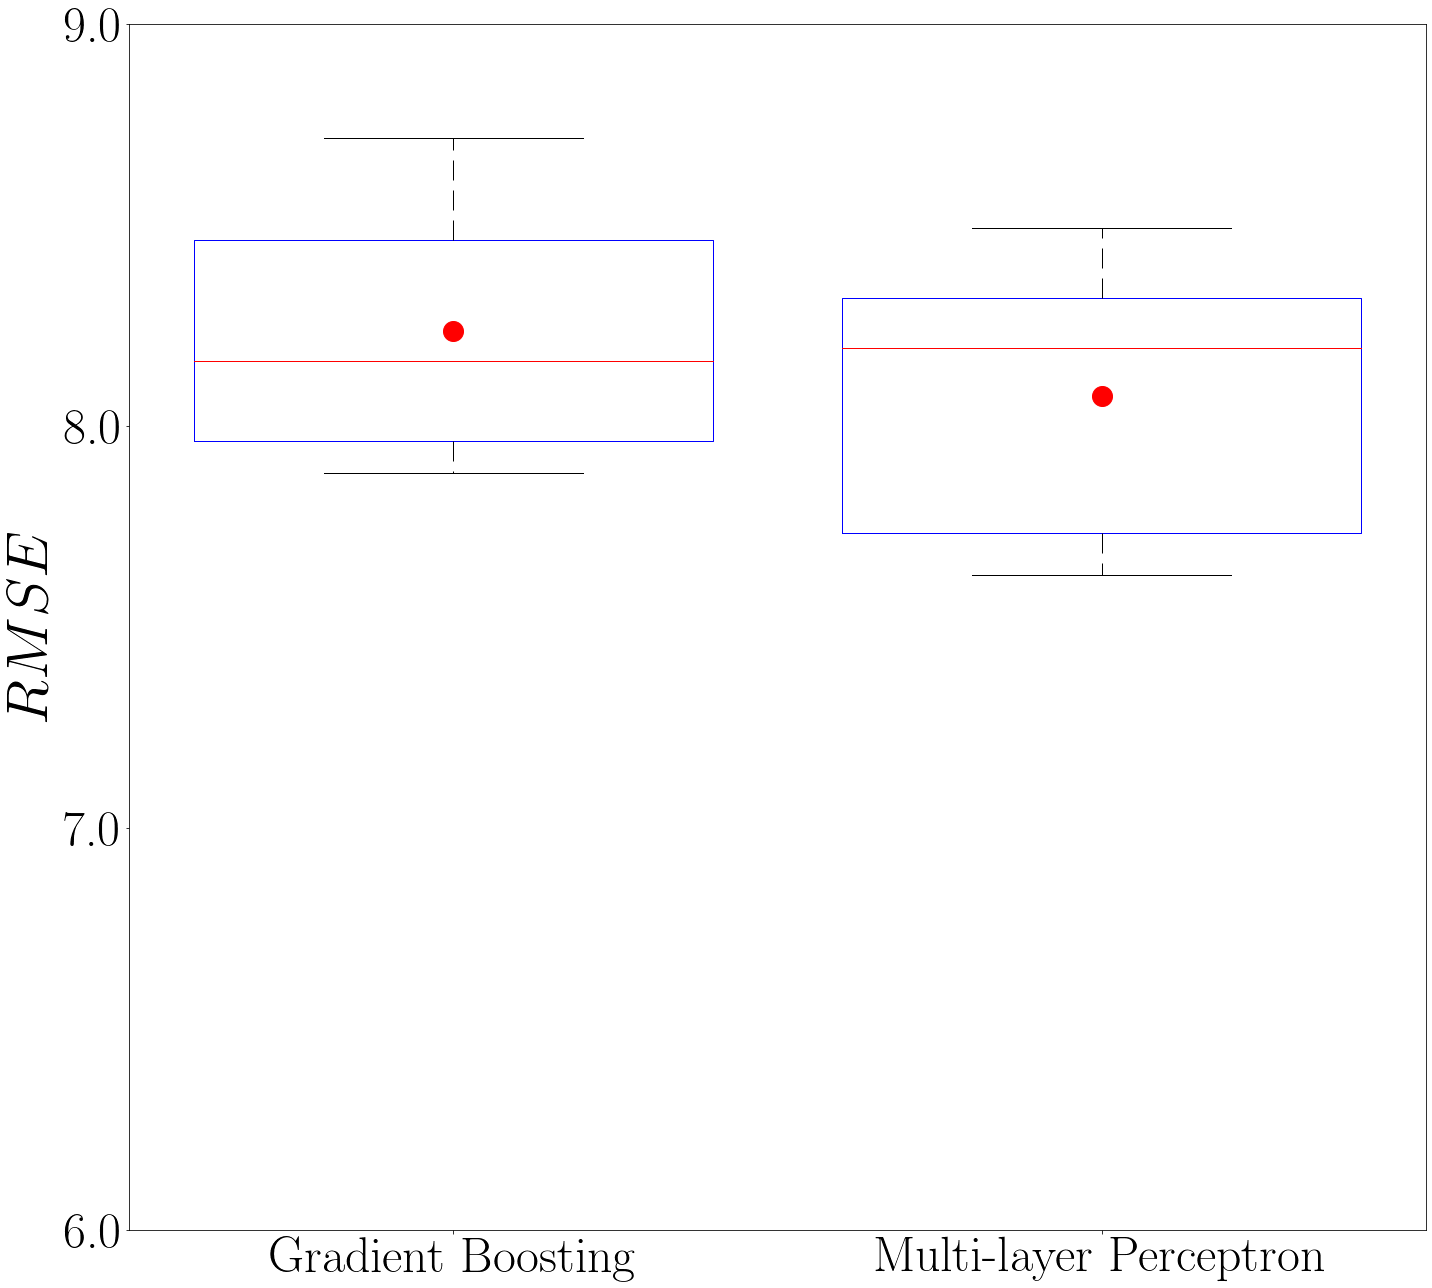

In [ ]:
fig, ax = plt.subplots(figsize=(20,18))
ynumbers = np.linspace(6.0,9.0,4) #scale of your x-axis
box_plot_data = [GBrmse, MLPrmse] #list your models in the order you want
label = ['Gradient Boosting','Multi-layer Perceptron'] #provide the label - this will be displayed on your x-axis

bp = ax.boxplot(box_plot_data,labels=label, widths = 0.8,vert=1,showmeans=True)
for box in bp['boxes']:
    # change outline color
    box.set(color='blue')
    # box.set(facecolor = 'white')
## change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='black',linestyle='dashed',dashes=[20,10])

## change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='black')

## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='red')

## change color and linewidth of the means
for mean in bp['means']:
    mean.set(marker='o',color='red')
    mean.set(markerfacecolor='red',markersize=20,markeredgecolor='red')


# linestyle='dashed', marker='o', markerfacecolor='blue', markersize=12

## change the style of fliers and their fill
for flier in bp['fliers']:
    flier.set(marker='+', color='red')
    flier.set(markerfacecolor='red',markersize=20,markeredgecolor='red', alpha=1.0)
##don't border much stop

ax.set_xticklabels(label,fontsize=50)
plt.yticks(ynumbers)
ax.set_yticklabels(ynumbers,fontsize=50)
# ax.invert_xaxis()  # labels read top-to-bottom
ax.set_ylabel('$RMSE$',fontsize=60)
fig.tight_layout()
#plt.savefig('tomi.pdf', dpi=600) #save your plot as pdf
plt.savefig("RMSE_Sel.jpg", format="jpg", dpi=900)
files.download('RMSE_Sel.jpg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

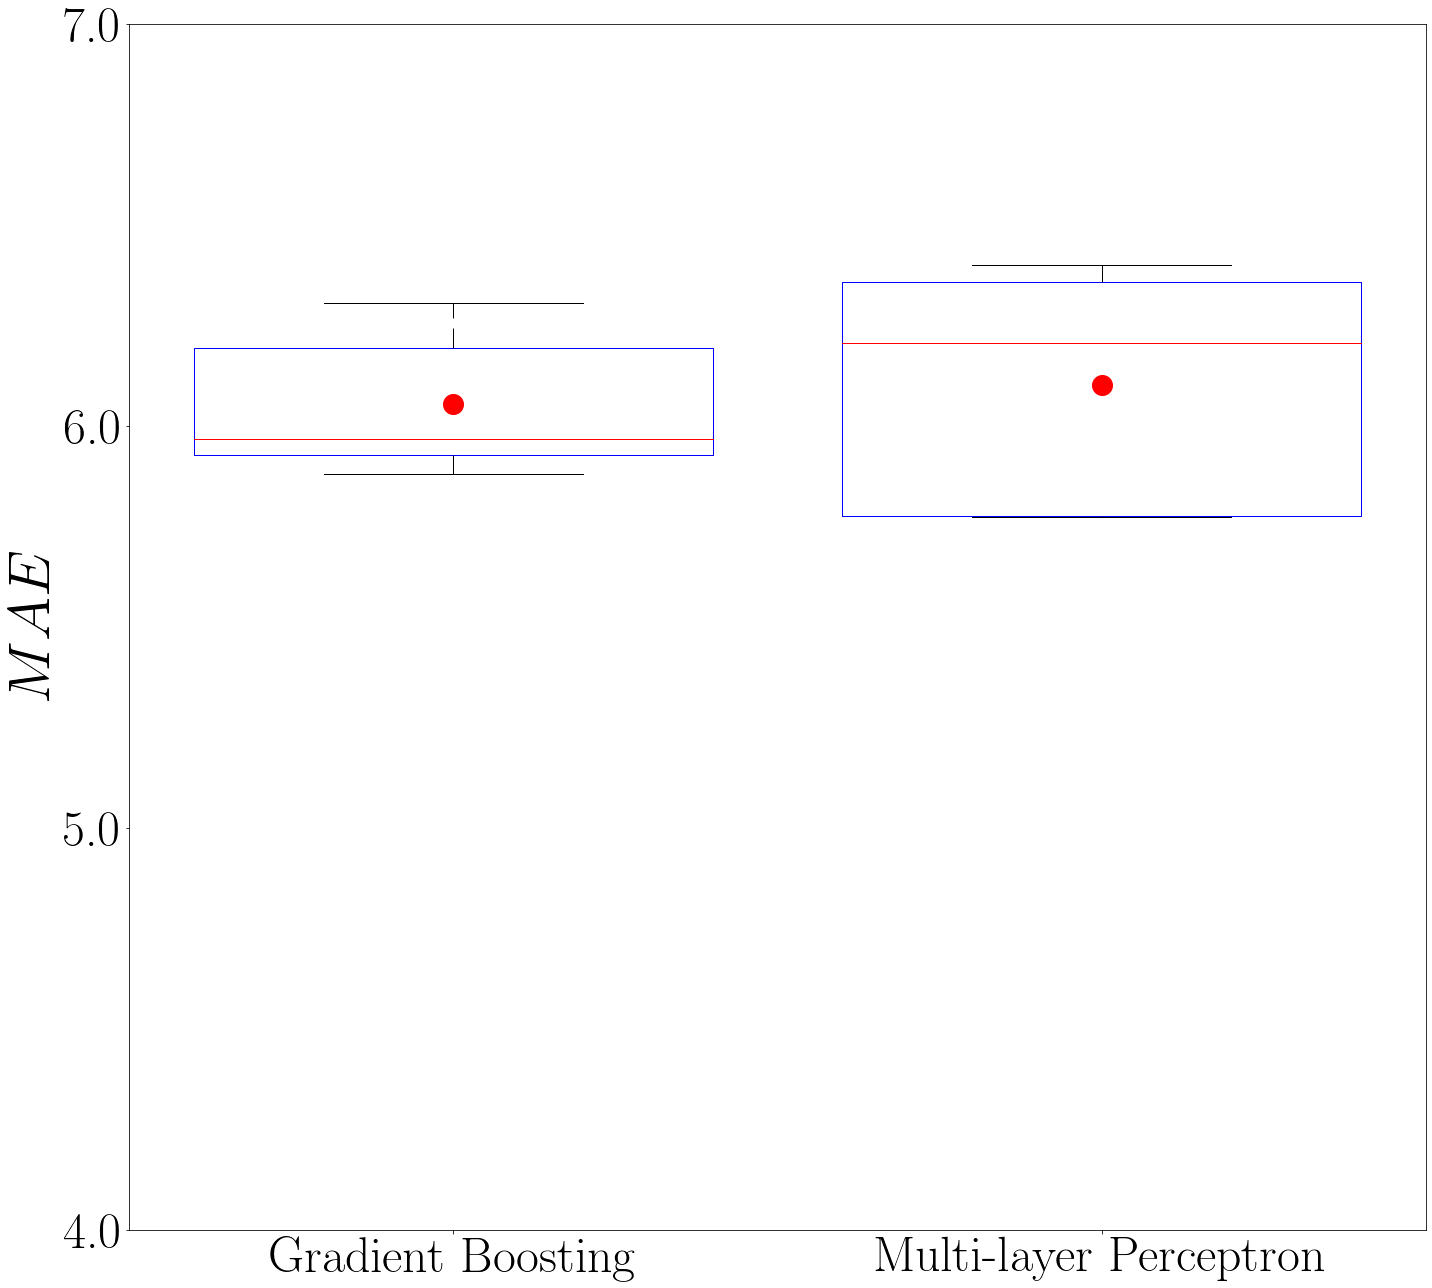

In [ ]:
fig, ax = plt.subplots(figsize=(20,18))
ynumbers = np.linspace(4.0,7.0,4) #scale of your x-axis
box_plot_data = [GBmae, MLPmae] #list your models in the order you want
label = ['Gradient Boosting','Multi-layer Perceptron'] #provide the label - this will be displayed on your x-axis

bp = ax.boxplot(box_plot_data,labels=label, widths = 0.8,vert=1,showmeans=True)
for box in bp['boxes']:
    # change outline color
    box.set(color='blue')
    # box.set(facecolor = 'white')
## change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='black',linestyle='dashed',dashes=[20,10])

## change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='black')

## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='red')

## change color and linewidth of the means
for mean in bp['means']:
    mean.set(marker='o',color='red')
    mean.set(markerfacecolor='red',markersize=20,markeredgecolor='red')


# linestyle='dashed', marker='o', markerfacecolor='blue', markersize=12

## change the style of fliers and their fill
for flier in bp['fliers']:
    flier.set(marker='+', color='red')
    flier.set(markerfacecolor='red',markersize=20,markeredgecolor='red', alpha=1.0)
##don't border much stop

ax.set_xticklabels(label,fontsize=50)
plt.yticks(ynumbers)
ax.set_yticklabels(ynumbers,fontsize=50)
# ax.invert_xaxis()  # labels read top-to-bottom
ax.set_ylabel('$MAE$',fontsize=60)
fig.tight_layout()
plt.savefig("MAE_Sel.jpg", format="jpg", dpi=900)
files.download('MAE_Sel.jpg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

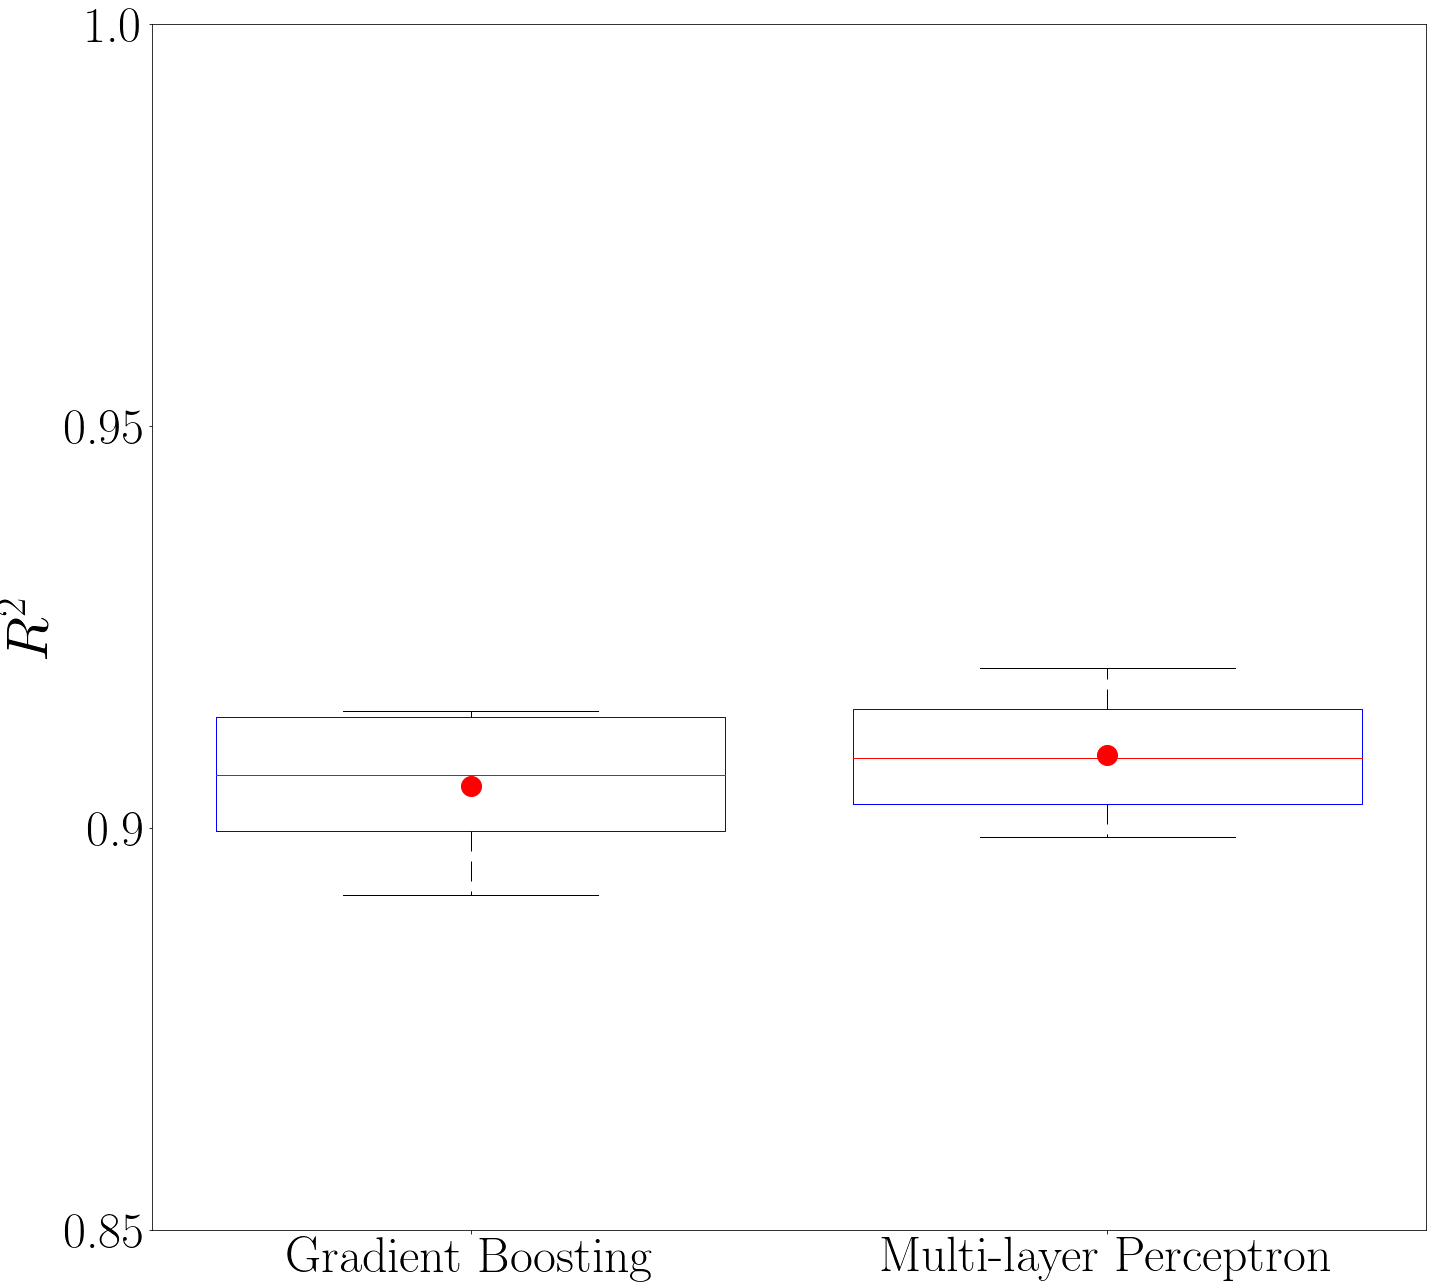

In [ ]:
fig, ax = plt.subplots(figsize=(20,18))
ynumbers = np.linspace(0.85,1.0,4) #scale of your x-axis
box_plot_data = [GBr2, MLPr2] #list your models in the order you want
label = ['Gradient Boosting','Multi-layer Perceptron'] #provide the label - this will be displayed on your x-axis

bp = ax.boxplot(box_plot_data,labels=label, widths = 0.8,vert=1,showmeans=True)
for box in bp['boxes']:
    # change outline color
    box.set(color='blue')
    # box.set(facecolor = 'white')
## change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='black',linestyle='dashed',dashes=[20,10])

## change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='black')

## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='red')

## change color and linewidth of the means
for mean in bp['means']:
    mean.set(marker='o',color='red')
    mean.set(markerfacecolor='red',markersize=20,markeredgecolor='red')


# linestyle='dashed', marker='o', markerfacecolor='blue', markersize=12

## change the style of fliers and their fill
for flier in bp['fliers']:
    flier.set(marker='+', color='red')
    flier.set(markerfacecolor='red',markersize=20,markeredgecolor='red', alpha=1.0)
##don't border much stop

ax.set_xticklabels(label,fontsize=50)
plt.yticks(ynumbers)
ax.set_yticklabels(ynumbers,fontsize=50)
# ax.invert_xaxis()  # labels read top-to-bottom
ax.set_ylabel('$R^2$',fontsize=60)
fig.tight_layout()
plt.savefig("R2_Sel.jpg", format="jpg", dpi=900)
files.download('R2_Sel.jpg')